# ABOUT DATA

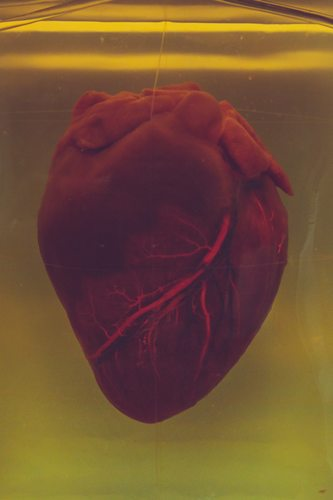

### There are some factors that affects Death Event. This dataset contains person's information like age ,sex , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time and we have to predict their DEATH EVENT.

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


from statsmodels.formula.api import ols



import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as gobj


init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
%matplotlib inline

from mlxtend.plotting import plot_confusion_matrix


from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import xgboost
import lightgbm
from catboost import CatBoostClassifier

print("libraries Loaded successfully")

C:\Users\iyanuoluwa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


libraries Loaded successfully


# Let Explore the data

In [3]:
heart_data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
heart_data.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
heart_data.shape

(299, 13)

In [6]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Coding of variables
* Sex(Gender of the patient): Male=0, Female=1
* diabetes: 0=No, 1=Yes
* anaemia: 0=No, 1=Yes
* high_blood_pressure: 0=No, 1=Yes
* smoking: 0=No, 1=Yes
* DEATH_EVENT: 0=No, 1=Yes

## Is Age and Sex an indicate for DEATH EVENT?

In [7]:
# age distribution

hist_data =[heart_data['age'].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')
fig.show()

* Age-wise 40 to 80 the spread is High
* less than 40 age and greater than 80 age people are very low

In [8]:
fig = px.box(heart_data, x='sex', y='age', points='all')
fig.update_layout(title_text='Gender wise Age Spread: Male =1, Female = 0')
fig.show()

In [9]:
male =heart_data[heart_data['sex']==1]
female=heart_data[heart_data['sex']==0]

male_survi=male[heart_data['DEATH_EVENT']==0]
male_not=male[heart_data['DEATH_EVENT']==1]
female_survi = female[heart_data['DEATH_EVENT']==0]
female_not=female[heart_data['DEATH_EVENT']==1]

labels = ['Male - Survived', 'Male - Not Survived', 'Female - Survived', 'Female - Not Survived']
values = [len(male[heart_data['DEATH_EVENT']==0]), len(male[heart_data['DEATH_EVENT']==1]),
         len(female[heart_data['DEATH_EVENT']==0]), len(female[heart_data['DEATH_EVENT']==1])]
fig=go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
title_text='Survival Analysis on Gender')
fig.show()

# Gender Factor Analysis

In [10]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['age']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['age']
hist_data = [surv, not_surv]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
title_text = 'Analysis of Age on Survival Status')
fig.show()

- Survival is high on 40 - 70 years old 
- The spread of Not survival is going through all ages.

In [11]:
fig = px.violin(heart_data, y='age', x='sex', color = 'DEATH_EVENT', box=True, points='all', hover_data=heart_data.columns)
fig.update_layout(
title_text = 'Age and Gender Analysis on Survival Status')
fig.show()

# Report

- Survival spread is high in age's flow of 40 to 70
- The Survival is high for both male between 60 to 70 and female's age between 50 to 70 respectively

In [12]:
fig = px.violin(heart_data, y='age', x='smoking', color='DEATH_EVENT', box = True, points = 'all', hover_data=heart_data.columns)
fig.update_layout(
title_text = 'Analysis in Age and  Smoking Survival Status')

### Report on Age and smoking survival Status
- The Survival is high for not smoking person 55 to 65, while for smoking person it is between 50 to 60
- Death event for smoking person is higher than not smoking person

In [13]:
fig = px.violin(heart_data, y='age', x='diabetes', points='all', color ='DEATH_EVENT', box=True, hover_data=heart_data.columns)
fig.update_layout(
title_text = 'Analysis of Age and Diabetes on Survival Status')
fig.show()

# Report:
- The Survival is high for non diabetes person 60 to 70, while for diabetes person it is between 60 to 65
- Death event for diabetes person is lower than non diabetes person

# Other Factors

## Using Historgram Plot

In [14]:
fig = px.histogram(heart_data, x ='creatinine_phosphokinase', color = 'DEATH_EVENT', marginal = 'violin', hover_data=heart_data.columns)
fig.update_layout(title_text = 'Creatinine_phosphokinase patient on Survival Status')
fig.show()

# Report:
More than 120 patient with creatinnine phosphokinase are on survival status

In [15]:
fig = px.histogram(heart_data, x= 'ejection_fraction', color = 'DEATH_EVENT', marginal ='violin', hover_data=heart_data.columns)
fig.update_layout(
title_text='Analysis of patient with Ejection Fraction on Survival Status')
fig.show()

In [16]:
fig = px.histogram(heart_data, x= 'platelets', color = 'DEATH_EVENT', marginal = 'violin', hover_data=heart_data.columns )
fig.update_layout(title_text='Platelets factors on Survival Status')
fig.show()

In [17]:
fig = px.histogram(heart_data, x='serum_creatinine', color='DEATH_EVENT', marginal='violin', hover_data=heart_data.columns)
fig.update_layout(title_text='Serum_creatinine patient on Survival Status')
fig.show()

In [18]:
fig = px.histogram(heart_data, x = 'serum_sodium', color = 'DEATH_EVENT', marginal = 'violin', hover_data=heart_data.columns)
fig.update_layout(title_text = 'serum_sodium patient on Survival Status')
fig.show()

### Distribution plots Survived and Not-Survived

In [19]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_sodium']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_sodium']
hist_data=[surv, not_surv]
group_label = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_label, bin_size=0.5)
fig.update_layout(title_text = 'Analysis in Serum Sodium on Survival Status')
fig.show()

In [20]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_creatinine']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_creatinine']
hist_data=[surv, not_surv]
group_label = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_label, bin_size=0.5)
fig.update_layout(title_text = 'Analysis in Serum_Creatinine on Survival Status')
fig.show()

In [21]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['ejection_fraction']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['ejection_fraction']
hist_data=[surv, not_surv]
group_label = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_label, bin_size=0.5)
fig.update_layout(title_text = 'Analysis in Ejection_fraction on Survival Status')
fig.show()

### Pie Chart

In [22]:
labels = ['No Diabetes', 'Diabetes']
No_diabetes = heart_data[heart_data['diabetes']==0]
Yes_diabetes = heart_data[heart_data['diabetes']==1]
values = [len(No_diabetes), len(Yes_diabetes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Analysis on Diabetes')



The above pie chart depicted that 58.2% (174) pepole are Not Diabetes Person and 41.8% (125) are Diabetes Person. we conclude that Number of Diabetes person are less than number of persons with No Diabetes

In [23]:
fig = px.pie(heart_data, values = 'diabetes', names = 'DEATH_EVENT', title = 'Diabetes Death Event Ratio')
fig.show()

From the Pie chart above we can conlude that 68%(85) diabetes patient recovered while 32%(40) result to death.

In [24]:
diabetes_yes_survi= Yes_diabetes[heart_data['DEATH_EVENT']==0]
diabetes_yes_not_survi= Yes_diabetes[heart_data['DEATH_EVENT']==1]
diabetes_no_survi = No_diabetes[heart_data['DEATH_EVENT']==0]
diabetes_no_not_survi = No_diabetes[heart_data['DEATH_EVENT']==1]

labels = ['Diabetes Yes - Survived', 'Diabetes Yes - Not Survived', 'Diabetes No - Survived', 'Diabetes No - Not Survived']
values = [
    len(Yes_diabetes[heart_data['DEATH_EVENT']==0]), len(Yes_diabetes[heart_data['DEATH_EVENT']==1]),
    len(No_diabetes[heart_data['DEATH_EVENT']==0]), len(No_diabetes[heart_data['DEATH_EVENT']==1])
]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole = .4)])
fig.update_layout(title_text='Analysis on Diabetes Survival')

- The pie charts shows that the  dataset of diabetes from 174 of Non Diabetes person 39.5%(118) survived and 18.7%(56) are not survived and
- From 125 Diabetes person 85 are survived, while 40 are not survived.

In [25]:
anaemia_no = heart_data[heart_data['anaemia']==0]
anaemia_yes = heart_data[heart_data['anaemia']==1]

labels = ['Without Anaemia', 'With Anaemia']
values = [
    len(heart_data[heart_data['anaemia']==0]), len(heart_data[heart_data['anaemia']==1])
]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Analysis on Anaemia')

From the above pie chart we can conclude that in our dataset 56.9%(170) pepoles are Non anaemic pepoles, while 43.1%(129) are anaemic pepoles.

In [26]:
fig = px.pie(heart_data, values = 'anaemia', names='DEATH_EVENT', title='Anaemia Death event ratio')
fig.show()

In [27]:
anaemia_yes_survi=anaemia_yes[heart_data['DEATH_EVENT']==0]
anaemia_yes_not_survi = anaemia_yes[heart_data['DEATH_EVENT']==1]
anaemia_no_survi = anaemia_no[heart_data['DEATH_EVENT']==0]
anaemia_no_not_survi = anaemia_no[heart_data['DEATH_EVENT']==1]

labels = ['Anaemia Yes - Survived', 'Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia No - Not Survived' ]
values = [
    len(anaemia_yes[heart_data['DEATH_EVENT']==0]), len(anaemia_yes[heart_data['DEATH_EVENT']==1]),
    len(anaemia_no[heart_data['DEATH_EVENT']==0]), len(anaemia_no[heart_data['DEATH_EVENT']==1])
]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, hole=.4)])
fig.update_layout(title_text = ' Survival Analysis on Anaemia')

Interpretation:
- From above pie charts we can conclude that in our dataset diabetes from 170 of Non Anaemic person 120 are survived and 50 are not survived and
- From 129 Anaemic person 83 are survived, while 46 are not survived.

In [28]:
hbp_yes = heart_data[heart_data['high_blood_pressure']==1]
hbp_no = heart_data[heart_data['high_blood_pressure']==0]

labels= ['High Blood Pressure - Yes', 'High Blood Pressure - No']

values = [
    len(hbp_yes), len(hbp_no)  
]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
title_text = 'Patient on High blood pressure')

From the above pie chart we can conclude that in our dataset 64.9%(194) pepoles are Non High BP pepoles, while 35.1%(105) are High BP pepoles.

In [29]:
fig= px.pie(heart_data, values= 'high_blood_pressure', names='DEATH_EVENT', title = 'High blood Pressure on Death Ratio')

fig.show()

In [30]:
hbp_yes_survi = hbp_yes[heart_data['DEATH_EVENT']==0]
hbp_yes_not_survi = hbp_yes[heart_data['DEATH_EVENT']==1]
hbp_no_survi = hbp_no[heart_data['DEATH_EVENT']==0]
hbp_no_not_survi = hbp_no[heart_data['DEATH_EVENT']==1]

labels = ['HBP Yes- Survived', 'HBP Yes- Not Survived', 
         'HBP No- Survived', 'HBP No- Not Survived']
values = [
    len(hbp_yes_survi), len(hbp_yes_not_survi), len(hbp_no_survi), len(hbp_no_not_survi)
]

fig = go.Figure(data = [go.Pie(labels = labels, values = values, hole = .4)])
fig.update_layout(title_text = 'Survival Analysis on HBP(High Blood Pressure)')

- From above pie charts we can conclude that in our dataset diabetes from 194 of Non High BP person 137 are survived and 57 are not survived and
- From 105 High BP person 66 are survived, while 39 are not survived.

In [31]:
hbp_yes_survi = hbp_yes[heart_data["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[heart_data["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[heart_data["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[heart_data["DEATH_EVENT"]==1] 

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[heart_data["DEATH_EVENT"]==0]),len(hbp_yes[heart_data["DEATH_EVENT"]==1]),
         len(hbp_no[heart_data["DEATH_EVENT"]==0]),len(hbp_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)")
fig.show()

In [32]:
no_smoking = heart_data[heart_data['smoking']==0]
yes_smoking = heart_data[heart_data['smoking']==1]

labels = ['With Smoking', 'Without Smoking']
values = [
    len(no_smoking), len(yes_smoking)
]
fig = go.Figure(data = [go.Pie(labels = labels, values=values, hole =.4)])
fig.update_layout(
    title_text = 'Analysis on Smoking'
)
fig.show()

From the above pie chart we can conclude that in our dataset 67.9%(203) pepoles are Non Smoking pepoles, while 32.1%(96) are Smoking pepoles.

In [33]:
fig = px.pie(heart_data, values='smoking', names='DEATH_EVENT', labels = 'DEATH RATIO ON SMOKING')
fig.show()

In [34]:
smoking_yes_survi = yes_smoking[heart_data['DEATH_EVENT']==0]
smoking_yes_not_survi = yes_smoking[heart_data['DEATH_EVENT']==1]
smoking_no_survi = no_smoking[heart_data['DEATH_EVENT']==0]
smoking_no_not_survi = no_smoking[heart_data['DEATH_EVENT']==1]

labels = ['Smoking Yes - Survived', 'Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking No - Not Survived']

values = [
    len(smoking_yes_survi), len(smoking_yes_not_survi), len(smoking_no_survi), len(smoking_no_not_survi)
]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole =.4)])
fig.update_layout(title_text = 'Survival Analysis on Smoking')


* From above pie charts we can conclude that in our dataset diabetes from 203 of Non Smoking person 137 are survived and 66 are not survived and
* From 96 Smoking person 66 are survived, while 30 are not survived.

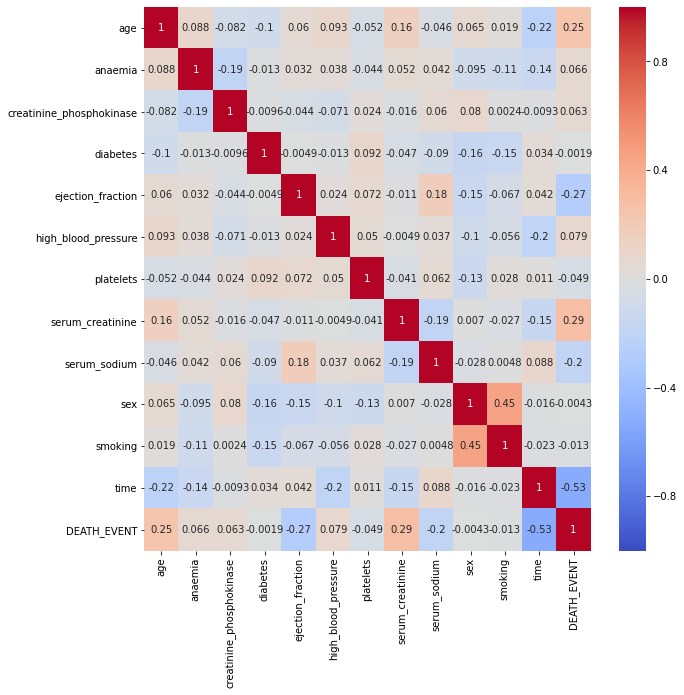

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(), vmin = -1, cmap='coolwarm', annot = True);

# DATA MODELING

### Train Test Split

In [1]:
heart_data.head(2)

NameError: name 'heart_data' is not defined

In [37]:
features = ['time', 'ejection_fraction', 'serum_creatinine', 'age']
x = heart_data[features]
y = heart_data['DEATH_EVENT']
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=2698)

In [38]:
accuracy_list = []

#### LOGISTIC REGRESSION

In [39]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [40]:
print(Fore.BLUE + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  90.00%


<Figure size 432x288 with 0 Axes>

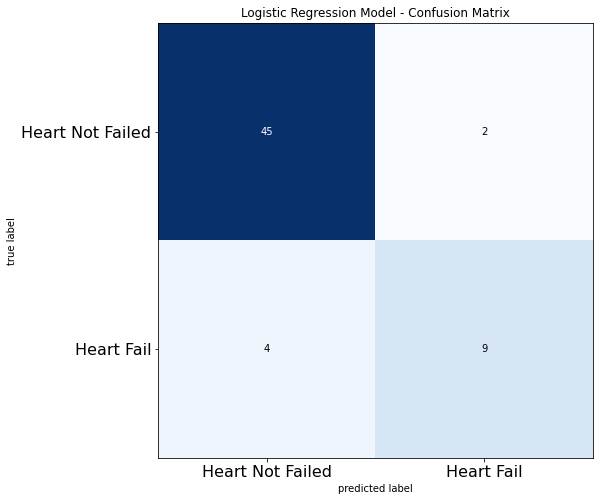

In [41]:
cm= confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title('Logistic Regression Model - Confusion Matrix')
plt.xticks(range(2), ['Heart Not Failed', 'Heart Fail'], fontsize = 16)
plt.yticks(range(2), ['Heart Not Failed', 'Heart Fail'], fontsize = 16)
plt.show()

#### Support Vector

In [42]:
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [43]:
print(Fore.GREEN + 'Accuracy of SVC is :', '{:.2f}%'.format(100* sv_clf_acc))

Accuracy of SVC is : 78.33%


<Figure size 432x288 with 0 Axes>

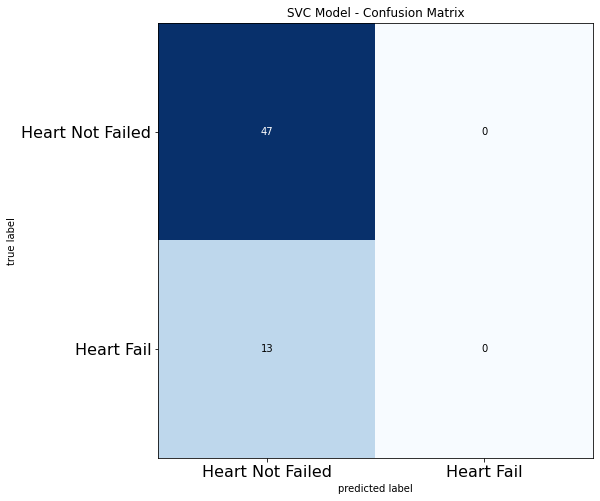

In [44]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

#### K Neighbors Classifier

In [45]:
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_clf_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100* kn_clf_acc)

In [46]:
print(Fore.GREEN + 'Accuracy of K Neighbors is :', '{:.2f}%'.format(100* kn_clf_acc))

Accuracy of K Neighbors is : 91.67%


<Figure size 432x288 with 0 Axes>

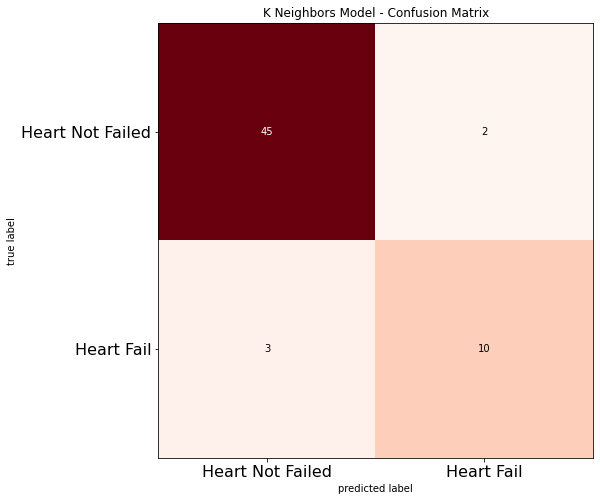

In [47]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks= True, cmap=plt.cm.Reds)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

#### Decision Tree Classifier

In [48]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100* dt_acc)

In [49]:
print(Fore.GREEN + 'Accuracy of Decision Tree Classifier', '{:.2f}%'.format(100* dt_acc))

Accuracy of Decision Tree Classifier 93.33%


<Figure size 432x288 with 0 Axes>

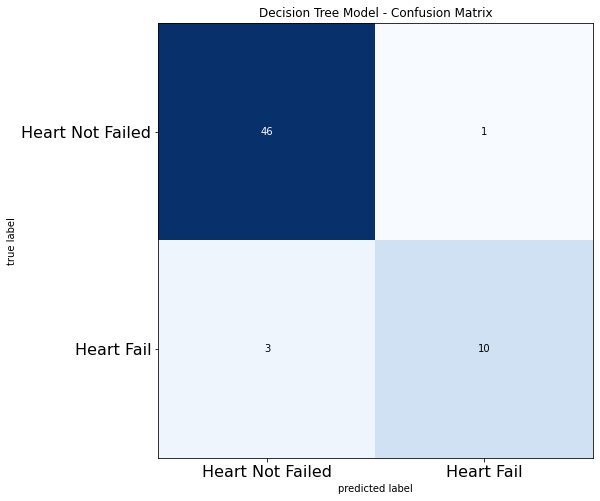

In [50]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks = True, cmap=plt.cm.Blues)
plt.title('Decision Tree Model - Confusion Matrix')
plt.xticks(range(2), ['Heart Not Failed', 'Heart Fail'], fontsize=16)
plt.yticks(range(2), ['Heart Not Failed', 'Heart Fail'], fontsize=16)
plt.show()

#### Random Forest Classifier

In [51]:
r_clf = RandomForestClassifier(max_features = 0.5, max_depth =15, random_state =1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100* r_acc)

In [52]:
print(Fore.GREEN + 'Accuracy for Random Forest Classfier is :', '{:.2f}%'.format(100* r_acc))

Accuracy for Random Forest Classfier is : 93.33%


<Figure size 432x288 with 0 Axes>

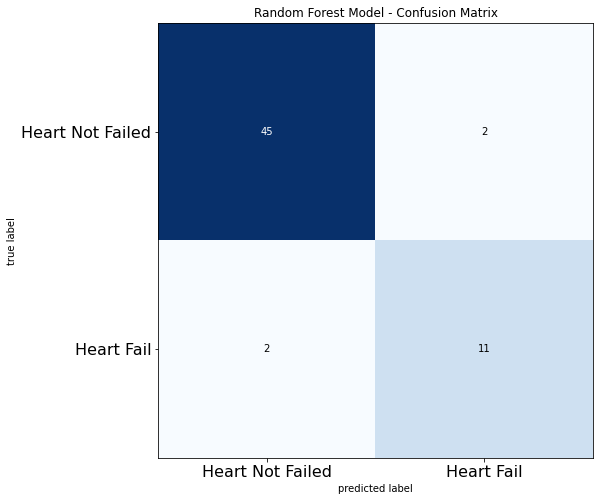

In [53]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title('Random Forest Model - Confusion Matrix')
plt.xticks(range(2), ['Heart Not Failed', 'Heart Fail'], fontsize=16)
plt.yticks(range(2), ['Heart Not Failed', 'Heart Fail'], fontsize=16)
plt.show()

### Gradient Boosting Classifier

In [54]:
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=4)
gradientboost_clf.fit(x_train, y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [55]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is:", "{:.2f}".format(100*gradientboost_acc))

Accuracy of Gradient Boosting is: 95.00


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

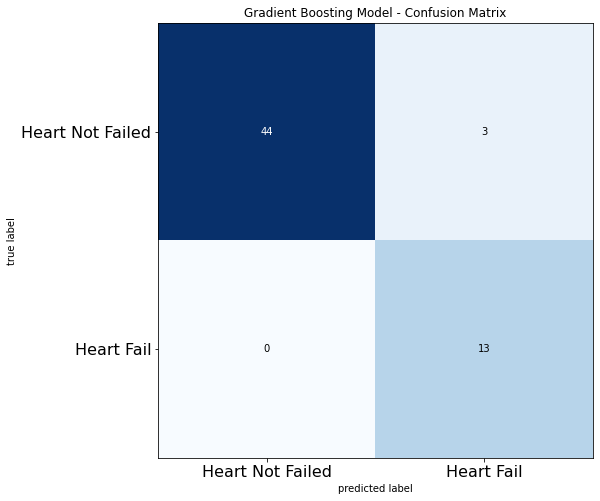

In [56]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("Gradient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize =16)
plt.yticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize =16)
plt.show

In [57]:
# xgboost Classifier
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=0)
xgb_clf.fit(x_train, y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [58]:
print(Fore.GREEN + "XgbrfClassifier accuracy is:", "{:.2f}".format(100* xgb_acc))

XgbrfClassifier accuracy is: 93.33


<Figure size 432x288 with 0 Axes>

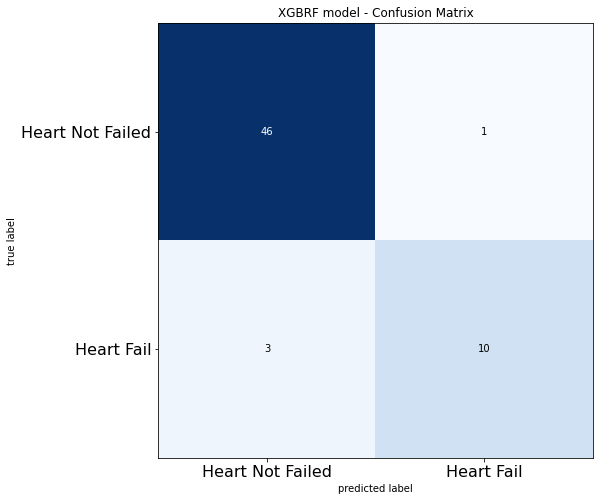

In [59]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("XGBRF model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize =16)
plt.yticks(range(2), ["Heart Not Failed", "Heart Fail"], fontsize =16)
plt.show()

### LGBMClassifier

In [60]:
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=1)
lgb_clf.fit(x_train,y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)


In [61]:
print(Fore.GREEN + "LGBMClassifier Accuracy is:", "{:.2f}%".format(100*lgb_acc))

LGBMClassifier Accuracy is: 96.67%


<Figure size 432x288 with 0 Axes>

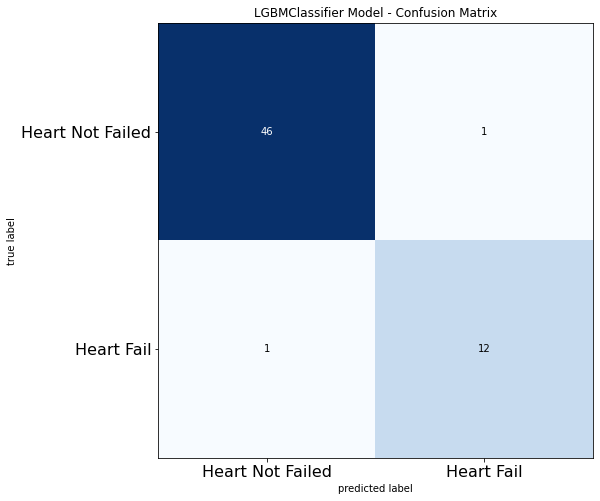

In [62]:
cm = confusion_matrix(y_test, lgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title('LGBMClassifier Model - Confusion Matrix' )
plt.xticks(range(2), ['Heart Not Failed', 'Heart Fail'], fontsize =16)
plt.yticks(range(2), ['Heart Not Failed', 'Heart Fail'], fontsize =16)
plt.show()

### CatBoostClassifier

In [63]:
cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
clf_pred = cat_clf.predict(x_test)
clf_acc = accuracy_score(y_test, clf_pred)
accuracy_list.append(100*clf_acc)


Learning rate set to 0.005591
0:	learn: 0.6887646	total: 365ms	remaining: 6m 4s
1:	learn: 0.6849678	total: 371ms	remaining: 3m 4s
2:	learn: 0.6802406	total: 378ms	remaining: 2m 5s
3:	learn: 0.6760052	total: 384ms	remaining: 1m 35s
4:	learn: 0.6721029	total: 390ms	remaining: 1m 17s
5:	learn: 0.6670045	total: 396ms	remaining: 1m 5s
6:	learn: 0.6633187	total: 407ms	remaining: 57.8s
7:	learn: 0.6595249	total: 428ms	remaining: 53s
8:	learn: 0.6557019	total: 433ms	remaining: 47.7s
9:	learn: 0.6520364	total: 438ms	remaining: 43.3s
10:	learn: 0.6481842	total: 442ms	remaining: 39.8s
11:	learn: 0.6445410	total: 628ms	remaining: 51.7s
12:	learn: 0.6415046	total: 635ms	remaining: 48.2s
13:	learn: 0.6380290	total: 639ms	remaining: 45s
14:	learn: 0.6351584	total: 644ms	remaining: 42.3s
15:	learn: 0.6319794	total: 649ms	remaining: 39.9s
16:	learn: 0.6292431	total: 654ms	remaining: 37.8s
17:	learn: 0.6258136	total: 836ms	remaining: 45.6s
18:	learn: 0.6219150	total: 840ms	remaining: 43.4s
19:	learn: 0.

161:	learn: 0.3723830	total: 4.26s	remaining: 22.1s
162:	learn: 0.3717688	total: 4.39s	remaining: 22.5s
163:	learn: 0.3711239	total: 4.39s	remaining: 22.4s
164:	learn: 0.3703215	total: 4.4s	remaining: 22.3s
165:	learn: 0.3690641	total: 4.41s	remaining: 22.1s
166:	learn: 0.3680480	total: 4.41s	remaining: 22s
167:	learn: 0.3671143	total: 4.42s	remaining: 21.9s
168:	learn: 0.3666670	total: 4.42s	remaining: 21.7s
169:	learn: 0.3662154	total: 4.43s	remaining: 21.6s
170:	learn: 0.3653716	total: 4.43s	remaining: 21.5s
171:	learn: 0.3646548	total: 4.44s	remaining: 21.4s
172:	learn: 0.3639688	total: 4.45s	remaining: 21.3s
173:	learn: 0.3632922	total: 4.45s	remaining: 21.1s
174:	learn: 0.3627374	total: 4.46s	remaining: 21s
175:	learn: 0.3620694	total: 4.56s	remaining: 21.4s
176:	learn: 0.3615830	total: 4.56s	remaining: 21.2s
177:	learn: 0.3609657	total: 4.57s	remaining: 21.1s
178:	learn: 0.3602726	total: 4.58s	remaining: 21s
179:	learn: 0.3595861	total: 4.58s	remaining: 20.9s
180:	learn: 0.35908

325:	learn: 0.2858636	total: 7.85s	remaining: 16.2s
326:	learn: 0.2855620	total: 7.86s	remaining: 16.2s
327:	learn: 0.2852006	total: 7.86s	remaining: 16.1s
328:	learn: 0.2849024	total: 7.87s	remaining: 16s
329:	learn: 0.2847021	total: 7.87s	remaining: 16s
330:	learn: 0.2844408	total: 7.97s	remaining: 16.1s
331:	learn: 0.2840807	total: 7.98s	remaining: 16.1s
332:	learn: 0.2838432	total: 7.99s	remaining: 16s
333:	learn: 0.2833605	total: 8s	remaining: 15.9s
334:	learn: 0.2830056	total: 8s	remaining: 15.9s
335:	learn: 0.2827256	total: 8.01s	remaining: 15.8s
336:	learn: 0.2824651	total: 8.01s	remaining: 15.8s
337:	learn: 0.2822581	total: 8.12s	remaining: 15.9s
338:	learn: 0.2819596	total: 8.12s	remaining: 15.8s
339:	learn: 0.2816519	total: 8.13s	remaining: 15.8s
340:	learn: 0.2814809	total: 8.14s	remaining: 15.7s
341:	learn: 0.2809407	total: 8.15s	remaining: 15.7s
342:	learn: 0.2807297	total: 8.18s	remaining: 15.7s
343:	learn: 0.2803435	total: 8.18s	remaining: 15.6s
344:	learn: 0.2797617	to

489:	learn: 0.2412196	total: 12.5s	remaining: 13s
490:	learn: 0.2409711	total: 12.5s	remaining: 13s
491:	learn: 0.2408362	total: 12.5s	remaining: 12.9s
492:	learn: 0.2406404	total: 12.5s	remaining: 12.9s
493:	learn: 0.2403342	total: 12.5s	remaining: 12.8s
494:	learn: 0.2402482	total: 12.5s	remaining: 12.8s
495:	learn: 0.2399643	total: 12.5s	remaining: 12.7s
496:	learn: 0.2397097	total: 12.5s	remaining: 12.7s
497:	learn: 0.2394915	total: 12.6s	remaining: 12.7s
498:	learn: 0.2393082	total: 12.6s	remaining: 12.6s
499:	learn: 0.2389623	total: 12.6s	remaining: 12.6s
500:	learn: 0.2388056	total: 12.6s	remaining: 12.5s
501:	learn: 0.2387078	total: 12.6s	remaining: 12.5s
502:	learn: 0.2385823	total: 12.6s	remaining: 12.4s
503:	learn: 0.2384853	total: 12.6s	remaining: 12.4s
504:	learn: 0.2383338	total: 12.6s	remaining: 12.3s
505:	learn: 0.2380695	total: 12.6s	remaining: 12.3s
506:	learn: 0.2376058	total: 12.6s	remaining: 12.3s
507:	learn: 0.2374746	total: 12.7s	remaining: 12.3s
508:	learn: 0.23

649:	learn: 0.2121259	total: 16.1s	remaining: 8.65s
650:	learn: 0.2121044	total: 16.1s	remaining: 8.62s
651:	learn: 0.2120772	total: 16.1s	remaining: 8.59s
652:	learn: 0.2119060	total: 16.1s	remaining: 8.56s
653:	learn: 0.2118748	total: 16.1s	remaining: 8.52s
654:	learn: 0.2115386	total: 16.1s	remaining: 8.49s
655:	learn: 0.2113244	total: 16.1s	remaining: 8.45s
656:	learn: 0.2111799	total: 16.2s	remaining: 8.48s
657:	learn: 0.2109737	total: 16.3s	remaining: 8.45s
658:	learn: 0.2107654	total: 16.3s	remaining: 8.41s
659:	learn: 0.2106193	total: 16.3s	remaining: 8.38s
660:	learn: 0.2104943	total: 16.3s	remaining: 8.34s
661:	learn: 0.2104345	total: 16.3s	remaining: 8.31s
662:	learn: 0.2102615	total: 16.3s	remaining: 8.28s
663:	learn: 0.2099796	total: 16.3s	remaining: 8.24s
664:	learn: 0.2098641	total: 16.3s	remaining: 8.21s
665:	learn: 0.2097870	total: 16.3s	remaining: 8.17s
666:	learn: 0.2097197	total: 16.3s	remaining: 8.14s
667:	learn: 0.2096264	total: 16.4s	remaining: 8.17s
668:	learn: 

811:	learn: 0.1870008	total: 20.8s	remaining: 4.81s
812:	learn: 0.1867815	total: 20.8s	remaining: 4.78s
813:	learn: 0.1866733	total: 20.9s	remaining: 4.78s
814:	learn: 0.1865883	total: 20.9s	remaining: 4.75s
815:	learn: 0.1865240	total: 20.9s	remaining: 4.71s
816:	learn: 0.1864566	total: 20.9s	remaining: 4.68s
817:	learn: 0.1864100	total: 20.9s	remaining: 4.65s
818:	learn: 0.1862497	total: 20.9s	remaining: 4.62s
819:	learn: 0.1861453	total: 21.1s	remaining: 4.62s
820:	learn: 0.1860561	total: 21.1s	remaining: 4.59s
821:	learn: 0.1859801	total: 21.1s	remaining: 4.56s
822:	learn: 0.1859140	total: 21.2s	remaining: 4.55s
823:	learn: 0.1857830	total: 21.2s	remaining: 4.53s
824:	learn: 0.1856732	total: 21.2s	remaining: 4.5s
825:	learn: 0.1854488	total: 21.2s	remaining: 4.47s
826:	learn: 0.1853481	total: 21.2s	remaining: 4.44s
827:	learn: 0.1851923	total: 21.2s	remaining: 4.41s
828:	learn: 0.1849702	total: 21.2s	remaining: 4.38s
829:	learn: 0.1849033	total: 21.3s	remaining: 4.37s
830:	learn: 0

973:	learn: 0.1654253	total: 25s	remaining: 667ms
974:	learn: 0.1651388	total: 25s	remaining: 640ms
975:	learn: 0.1650447	total: 25s	remaining: 614ms
976:	learn: 0.1649342	total: 25s	remaining: 588ms
977:	learn: 0.1648510	total: 25s	remaining: 562ms
978:	learn: 0.1648264	total: 25.1s	remaining: 539ms
979:	learn: 0.1647454	total: 25.2s	remaining: 513ms
980:	learn: 0.1646374	total: 25.2s	remaining: 487ms
981:	learn: 0.1644507	total: 25.2s	remaining: 461ms
982:	learn: 0.1643536	total: 25.2s	remaining: 435ms
983:	learn: 0.1642171	total: 25.3s	remaining: 411ms
984:	learn: 0.1640999	total: 25.3s	remaining: 385ms
985:	learn: 0.1640074	total: 25.3s	remaining: 359ms
986:	learn: 0.1638337	total: 25.3s	remaining: 333ms
987:	learn: 0.1637792	total: 25.3s	remaining: 307ms
988:	learn: 0.1637068	total: 25.3s	remaining: 281ms
989:	learn: 0.1635763	total: 25.4s	remaining: 257ms
990:	learn: 0.1633669	total: 25.4s	remaining: 231ms
991:	learn: 0.1632824	total: 25.4s	remaining: 205ms
992:	learn: 0.1631473	

In [64]:
print(Fore.GREEN + "CatBoost Classifier Accuracy is:", "{:.2f}%".format(100* clf_acc))

CatBoost Classifier Accuracy is: 95.00%


<Figure size 432x288 with 0 Axes>

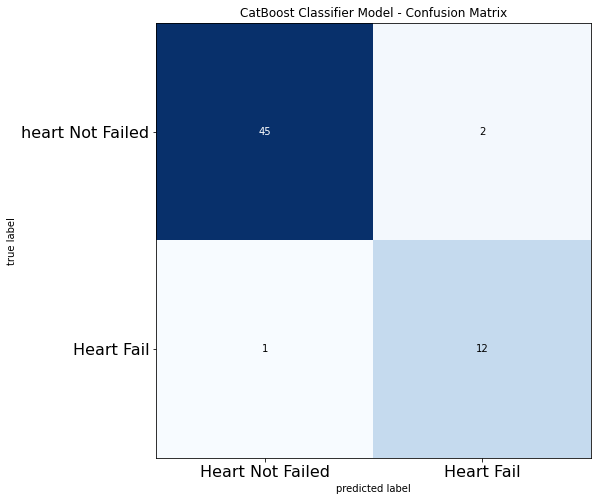

In [65]:
cm = confusion_matrix(y_test, clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title('CatBoost Classifier Model - Confusion Matrix')
plt.xticks(range(2), ['Heart Not Failed', 'Heart Fail'], fontsize = 16)
plt.yticks(range(2), ['heart Not Failed', 'Heart Fail'], fontsize = 16)
plt.show()

In [66]:
model_list = ['LogisticRegression', 'SVC', 'KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster', 'XGBRF','LGBM', 'CatBoostClassifier']

In [67]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LR', LogisticRegression()))
models.append(('LR', LogisticRegression()))
models.append(('LR', LogisticRegression()))
models.append(('LR', LogisticRegression()))


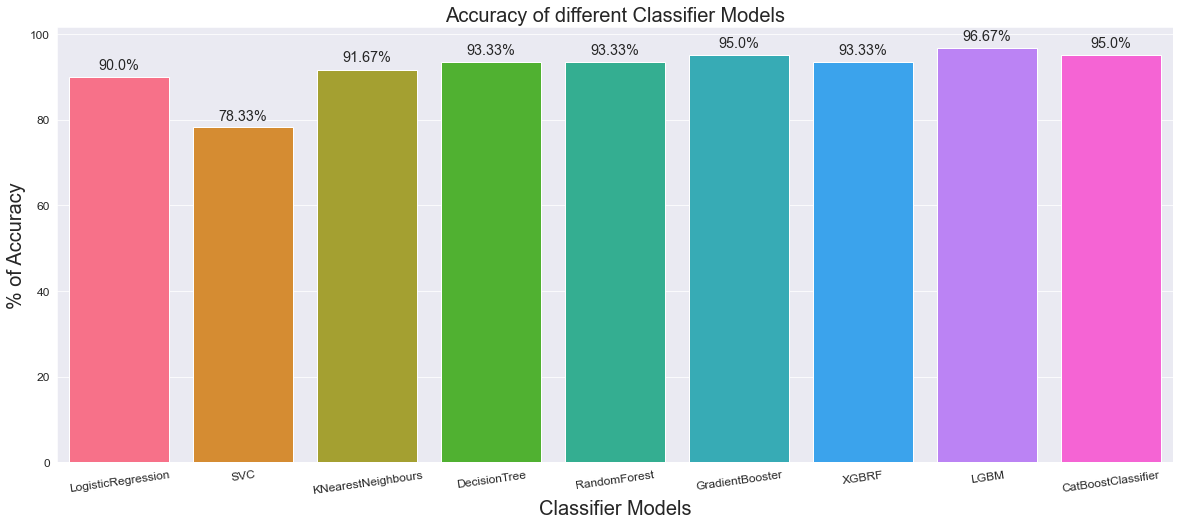

In [72]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(y=accuracy_list, x=model_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Logistic Regression: 90.0%
SVC: 78.33%
KNeighborsClassifier: 91.67%
DecisionTreeClassifier: 93.33%
Random Forest Classifier: 93.33%
Gradient Booster Classifier: 95.0%
XGBRFClassifier: 93.33%
LGBMClassifier: 96.67%
Cat Boost Classifier: 95.0%

### Thank you!